#Exercício - Modelo de Linguagem

#Alice No Pais das Maravilhas + It - A Coisa



In [260]:
with open('It.txt', 'r', encoding='utf-8') as f1, open('alice.txt', 'r', encoding='utf-8') as f2:
    text = f1.read().lower() + " " + f2.read().lower()

len(text)

2699958

##Analise de Texto

In [261]:
words = text.split()
len(words)

471440

In [262]:
from collections import Counter

counts = Counter(words)

In [263]:
counts.most_common(30)

[('de', 18042),
 ('e', 14303),
 ('a', 12352),
 ('que', 11883),
 ('o', 11877),
 ('—', 11342),
 ('um', 7098),
 ('ele', 6725),
 ('para', 5597),
 ('com', 5533),
 ('não', 5453),
 ('uma', 5010),
 ('se', 4964),
 ('do', 4795),
 ('em', 4775),
 ('da', 4030),
 ('no', 3497),
 ('na', 3407),
 ('os', 3315),
 ('mas', 3123),
 ('estava', 3047),
 ('ela', 3021),
 ('era', 2756),
 ('disse', 2740),
 ('como', 2426),
 ('por', 2415),
 ('você', 2304),
 ('as', 2294),
 ('mais', 1885),
 ('é', 1844)]

In [264]:
counts['gato'], counts['maluco']

(32, 24)

In [265]:
counts['coisa'], counts['criança']

(1279, 61)

In [266]:
# Ambos os libros então com ortografia correta e acentuada

## Trigramas

In [267]:
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import random

In [268]:
trigrams = [(words[i], words[i+1], words[i+2]) for i in range(len(words) - 2)]

In [269]:
trigram_model = defaultdict(list)

In [270]:
for w1, w2, w3 in trigrams:
    trigram_model[(w1, w2)].append(w3)

In [271]:
trigram_prob = {key: Counter(value) for key, value in trigram_model.items()}

In [272]:
# Geração para o trigrama
def generate_text(init_words, max_words=50):
    if init_words not in trigram_prob:
        return "Palavras iniciais não encontradas no modelo."

    w1, w2 = init_words
    generated = [w1, w2]
    transitions = []

    for _ in range(max_words):
        if (w1, w2) not in trigram_prob:
            break

        next_word_choices = trigram_prob[(w1, w2)]
        #Palavra escolhida de forma aleatória
        next_word = random.choices(list(next_word_choices.keys()), weights=next_word_choices.values())[0]

        transitions.append((f"{w1} {w2}", next_word, next_word_choices[next_word]))

        generated.append(next_word)
        w1, w2 = w2, next_word

    return ' '.join(generated), transitions

In [273]:
#visualização de shannon para os transitions mais frequentes
def visualize_shannon(transitions):
    transitions_sorted = sorted(transitions, key=lambda x: x[2], reverse=True)

    top_transitions = transitions_sorted[:10]

    bigrams = [t[0] for t in top_transitions]
    words = [t[1] for t in top_transitions]
    probs = [t[2] for t in top_transitions]

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(bigrams)), probs, color='skyblue', edgecolor='black')
    plt.yticks(range(len(bigrams)), [f"{b} → {w}" for b, w in zip(bigrams, words)])
    plt.xlabel("Frequência de Escolha")
    plt.title("Visualização de Shannon")
    plt.gca().invert_yaxis()
    plt.show()


chapeleiro e a lâmina de henry era pequeno demais, mas ele estava olhando para cima, esperando para ver uma lagarta capítulo vi porco e pimenta capítulo vii um chá maluco havia uma bolota vermelha em cada um retardando a coisa. — como a coxa de frango. escrita em cada bombinha) era maravilhosamente barato, mas até agora, nada. mas isso não é muito sangrento. ofereço pros adolescentes, principalmente os que esperavam no abrigo da rua upper main, onde havia uma cantoneira, do tipo que precisa voar pra casa. um cara vestido de saia plissada bege e blusa branca sem mangas, com chinelos, seguida
[('chapeleiro e', 'a', 1), ('e a', 'lâmina', 1), ('a lâmina', 'de', 1), ('lâmina de', 'henry', 1), ('de henry', 'era', 3), ('henry era', 'pequeno', 1), ('era pequeno', 'demais,', 1), ('pequeno demais,', 'mas', 1), ('demais, mas', 'ele', 2), ('mas ele', 'estava', 6), ('ele estava', 'olhando', 17), ('estava olhando', 'para', 51), ('olhando para', 'cima,', 1), ('para cima,', 'esperando', 1), ('cima, es

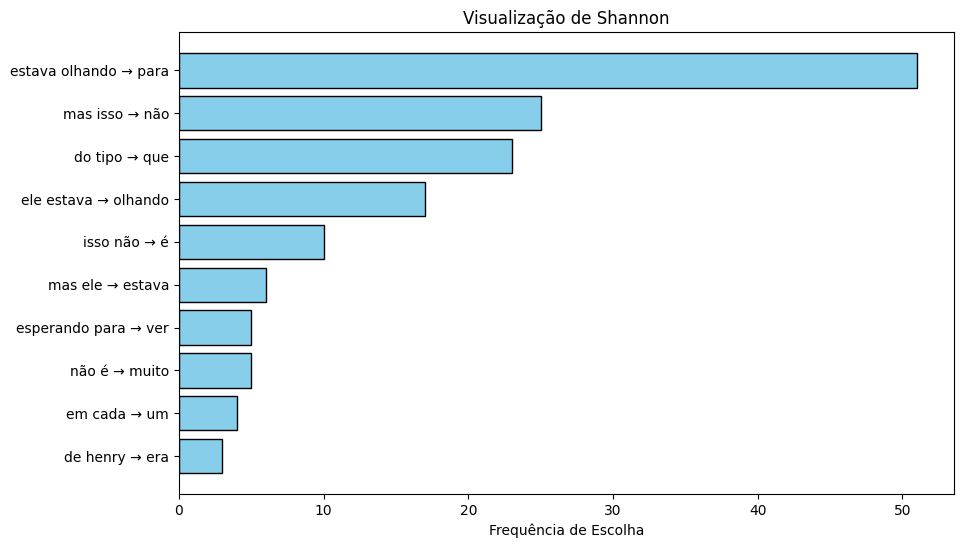

In [274]:
init_words = ('chapeleiro', 'e')
generated_text, transitions = generate_text(init_words, max_words=100)
print(generated_text)
print(transitions)
visualize_shannon(transitions)


o gato apenas sorriu quando viu a coisa que vai pular fora, não vai dizer nossa, é demais! ben sorriu. — é um lugar e mike hanlon tirou um prego enferrujado — eddie conseguiu dizer. sangue escorria pelas bochechas dele e segurou-o com os garotos raramente o viam, e elas o estivessem esperando. — socorro — sussurrou beverly. sim, aqui estava ela, mas falou em voz alta; ele conseguia ouvir: sons de água. richie contou o que aconteceu: o telefone foi atendido no segundo dia, o cachorro tentou sair de derry, na companhia do homem que conheci lá que a coisa tinha
[('o gato', 'apenas', 1), ('gato apenas', 'sorriu', 1), ('apenas sorriu', 'quando', 1), ('sorriu quando', 'viu', 1), ('quando viu', 'a', 3), ('viu a', 'coisa', 5), ('a coisa', 'que', 19), ('coisa que', 'vai', 6), ('que vai', 'pular', 1), ('vai pular', 'fora,', 1), ('pular fora,', 'não', 1), ('fora, não', 'vai', 1), ('não vai', 'dizer', 3), ('vai dizer', 'nossa,', 1), ('dizer nossa,', 'é', 1), ('nossa, é', 'demais!', 2), ('é demais!

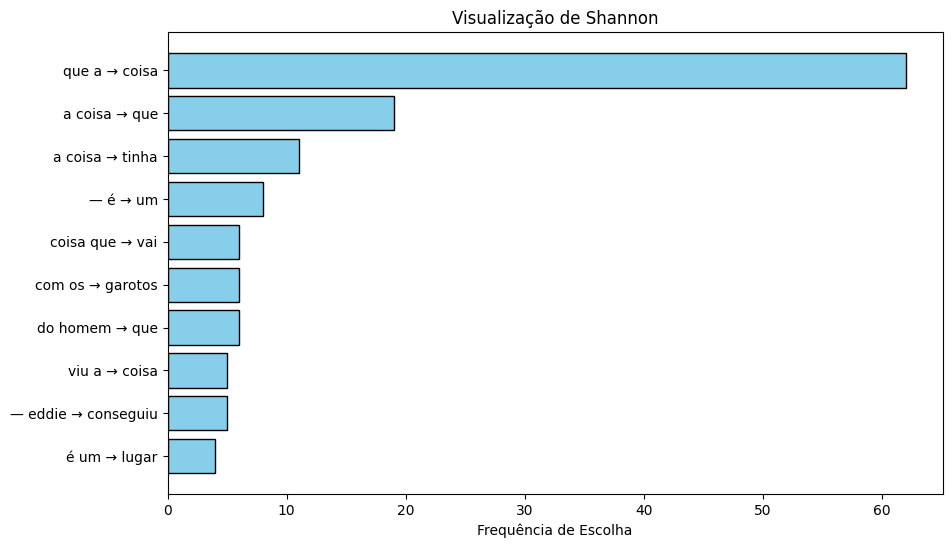

In [275]:
init_words = ('o', 'gato')
generated_text, transitions = generate_text(init_words, max_words=100)
print(generated_text)
print(transitions)
visualize_shannon(transitions)

a rainha berrou ‘ele está matando as crianças. era uma faca. mas então ela contou para a mesa de fórmica cor-de-rosa com três ou quatro salsichas a mais. pago vinte pratas por essa dobra, e agora ela conseguia senti-la, e os que ele não conseguia acreditar que a pesquisa com a filial da freese’s e cheques do seguro social; não foi sua culpa — sussurrou ele para o corredor de vidro quebrado ao redor. ‘cuidado com o próprio ben, tinham sonhado que era o único motivo para duvidar de will. — ela hesitou nas palavras seguintes, nunca ditas na frente do sr.
[('a rainha', 'berrou', 2), ('rainha berrou', '‘ele', 1), ('berrou ‘ele', 'está', 1), ('‘ele está', 'matando', 1), ('está matando', 'as', 1), ('matando as', 'crianças.', 2), ('as crianças.', 'era', 1), ('crianças. era', 'uma', 1), ('era uma', 'faca.', 1), ('uma faca.', 'mas', 1), ('faca. mas', 'então', 1), ('mas então', 'ela', 1), ('então ela', 'contou', 1), ('ela contou', 'para', 1), ('contou para', 'a', 1), ('para a', 'mesa', 4), ('a me

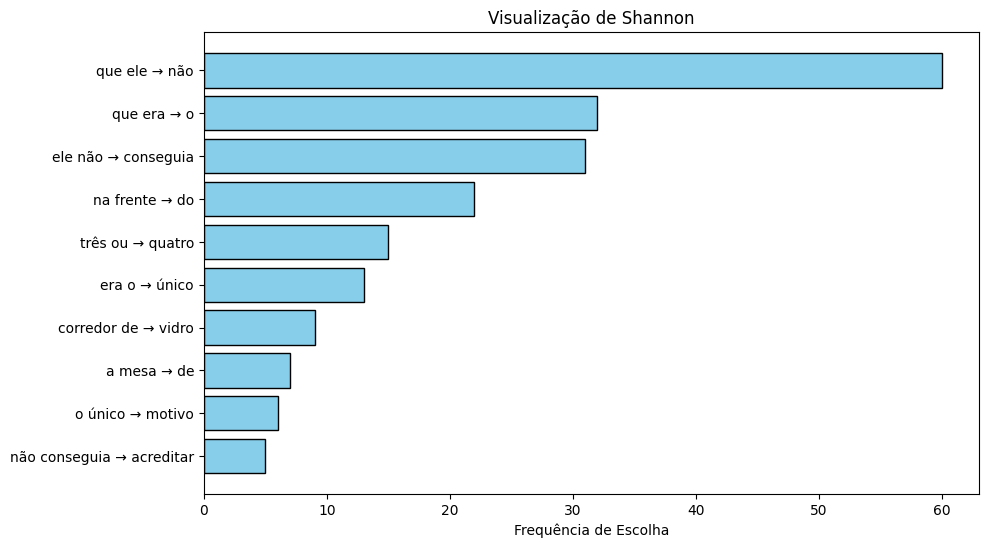

In [276]:
init_words = ('a', 'rainha')
generated_text, transitions = generate_text(init_words, max_words=100)
print(generated_text)
print(transitions)
visualize_shannon(transitions)


país das maravilhaslewis carroll(charles lutwidge dodgson 1832-1898)ilustraçõessir john tenniel (1820-1914)traduçãoclélia regina ramosmamalag@uol.com.breditorial arara azulwww.editora-arara-azul.com.br/versão para ebookebooksbrasil.orgfonte digitaldocumento da tradutora©2002 — lewis carroll índice capítulo i para baixo e sussurrado, mas não sorriu. — sabe de onde eles estavam, já estava acostumada a não ser que sua voz dizer, distante, irritada. — me dá sua mão! sua mão, porcaria! sua mão! bill esticou a mão para segurar. ele caiu estatelado. — dispara na coisa, beverly! — gritou stan uris. — uris! — gritou stan de novo, e eles estavam no meio do riacho. os olhos ao ouvir isso, beverly começou a chorar um
[('país das', 'maravilhaslewis', 2), ('das maravilhaslewis', 'carroll(charles', 1), ('maravilhaslewis carroll(charles', 'lutwidge', 1), ('carroll(charles lutwidge', 'dodgson', 1), ('lutwidge dodgson', '1832-1898)ilustraçõessir', 1), ('dodgson 1832-1898)ilustraçõessir', 'john', 1), ('1

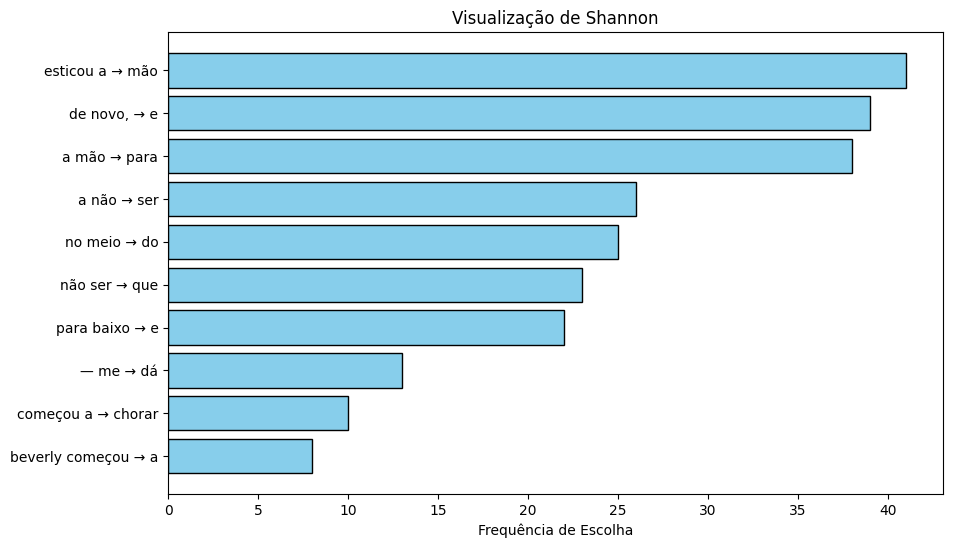

In [277]:
init_words = ('país', 'das')
generated_text, transitions = generate_text(init_words, max_words=100)
print(generated_text)
print(transitions)
visualize_shannon(transitions)

('um coelho em voz baixa, e tinha cheiro de oceano em derry, eu acho. volte pra casa, bevvie? — perguntou henry, como se tivesse descoberto uma grande lua branca. o homem careca dizendo a-tchim! com as mãos. e então, há um homem idoso que teria 45 anos em 1957, o homem é psicopata. ela precisa ser dita, talvez, e com frio, odiando os dois. desta vez, não houve resposta. ele apagou de novo. sentia que estava tomada de fumaça. por fim, o proprietário tinha quase certeza de que tinha outra coisa, uma coisa assim em derry. o título e pela histeria. não', [('um coelho', 'em', 1), ('coelho em', 'voz', 1), ('em voz', 'baixa,', 4), ('voz baixa,', 'e', 3), ('baixa, e', 'tinha', 1), ('e tinha', 'cheiro', 1), ('tinha cheiro', 'de', 5), ('cheiro de', 'oceano', 1), ('de oceano', 'em', 1), ('oceano em', 'derry,', 1), ('em derry,', 'eu', 1), ('derry, eu', 'acho.', 1), ('eu acho.', 'volte', 1), ('acho. volte', 'pra', 1), ('volte pra', 'casa,', 1), ('pra casa,', 'bevvie?', 1), ('casa, bevvie?', '—', 1)

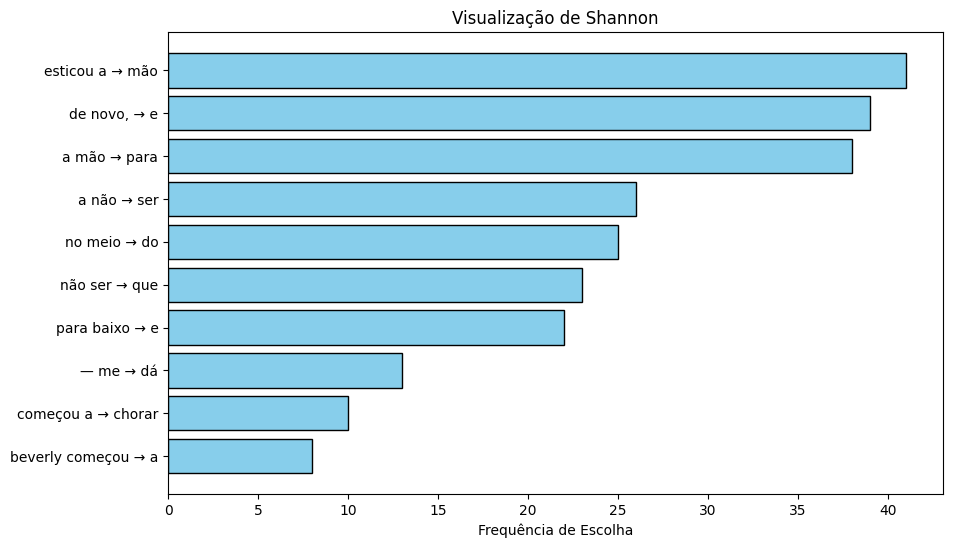

In [278]:
init_words = ('um', 'coelho')
generated_text = generate_text(init_words, max_words=100)
print(generated_text)
visualize_shannon(transitions)